In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
# Collect Data using Pandas

In [155]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [156]:
# Checking how many rows and columns in the data set

In [157]:
df1.shape

(13320, 9)

In [158]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [159]:
# Droping columns which are not useful and saving the data into new data file.

In [160]:
df2 = df1.drop(["area_type", "availability", "society", "balcony"], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [161]:
# Data cleaning 

In [162]:
# Checking weather missing values are there in the data 

In [163]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [164]:
# Less missing values so droping the rows which has null values

In [165]:
df3 = df2.dropna()

# checking any null values after droping rows

df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [166]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [167]:
df3.shape

(13246, 5)

In [168]:
# Different values in size variable 

In [169]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [170]:
# Splitting a value in variable 

In [171]:
df3["BHK"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ptaru\AppData\Local\Temp\ipykernel_21108\2416278530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))


In [172]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [173]:
df3["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [174]:
df3[df3["BHK"] > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [175]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [176]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [177]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [178]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [179]:
convert_sqft_to_num("2600")

2600.0

In [180]:
convert_sqft_to_num("1195 - 1440")

1317.5

In [181]:
convert_sqft_to_num("4125Perch")

In [182]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [183]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [184]:
# df4.loc[410]

In [185]:
df5 = df4.dropna()
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [186]:
df5.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [187]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   BHK         13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [188]:
df5["price_per_sqft"] = df5['price'] * 100000 / df5["total_sqft"]
df5.head()

C:\Users\ptaru\AppData\Local\Temp\ipykernel_21108\1487189050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["price_per_sqft"] = df5['price'] * 100000 / df5["total_sqft"]


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [189]:
len(df5["location"].unique())

1298

In [190]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

loc_info = df5.groupby("location")["location"].agg('count').sort_values(ascending = False)
loc_info

C:\Users\ptaru\AppData\Local\Temp\ipykernel_21108\3965788374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['location'] = df5['location'].apply(lambda x: x.strip())


location
Whitefield                                        533
Sarjapur  Road                                    392
Electronic City                                   304
Kanakpura Road                                    264
Thanisandra                                       235
                                                 ... 
4th Block HBR Layout                                1
5th block Koramangala                               1
6th Block Jayanagar                                 1
6th Block Rajaji Nagar                              1
6th block banashankari 3rd stage, 100 feet ORR      1
Name: location, Length: 1287, dtype: int64

In [191]:
len(loc_info[loc_info <= 10])

1047

In [192]:
loc_less_than_10 = loc_info[loc_info <= 10]
loc_less_than_10

location
Thyagaraja Nagar                                  10
Dodsworth Layout                                  10
Gunjur Palya                                      10
BTM 1st Stage                                     10
Naganathapura                                     10
                                                  ..
4th Block HBR Layout                               1
5th block Koramangala                              1
6th Block Jayanagar                                1
6th Block Rajaji Nagar                             1
6th block banashankari 3rd stage, 100 feet ORR     1
Name: location, Length: 1047, dtype: int64

In [193]:
len(df5['location'].unique())

1287

In [194]:
df5['location'] = df5['location'].apply(lambda x: "other" if x in loc_less_than_10 else x)

C:\Users\ptaru\AppData\Local\Temp\ipykernel_21108\2877538404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['location'] = df5['location'].apply(lambda x: "other" if x in loc_less_than_10 else x)


In [195]:
len(df5['location'].unique())

241

In [196]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [197]:
len(df5[df5['total_sqft'] / df5['BHK'] < 300])

744

In [198]:
df5[df5['total_sqft'] / df5['BHK'] < 300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [199]:
df5.shape

(13200, 7)

In [200]:
df6 = df5[~(df5['total_sqft'] / df5['BHK'] < 300)]
df6.shape

(12456, 7)

In [201]:
def removing_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = subdf['price_per_sqft'].mean()
        sd = subdf['price_per_sqft'].std()
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - sd)) & (subdf['price_per_sqft'] <= (m + sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = removing_pps_outliers(df6)
df7.shape

(10293, 7)

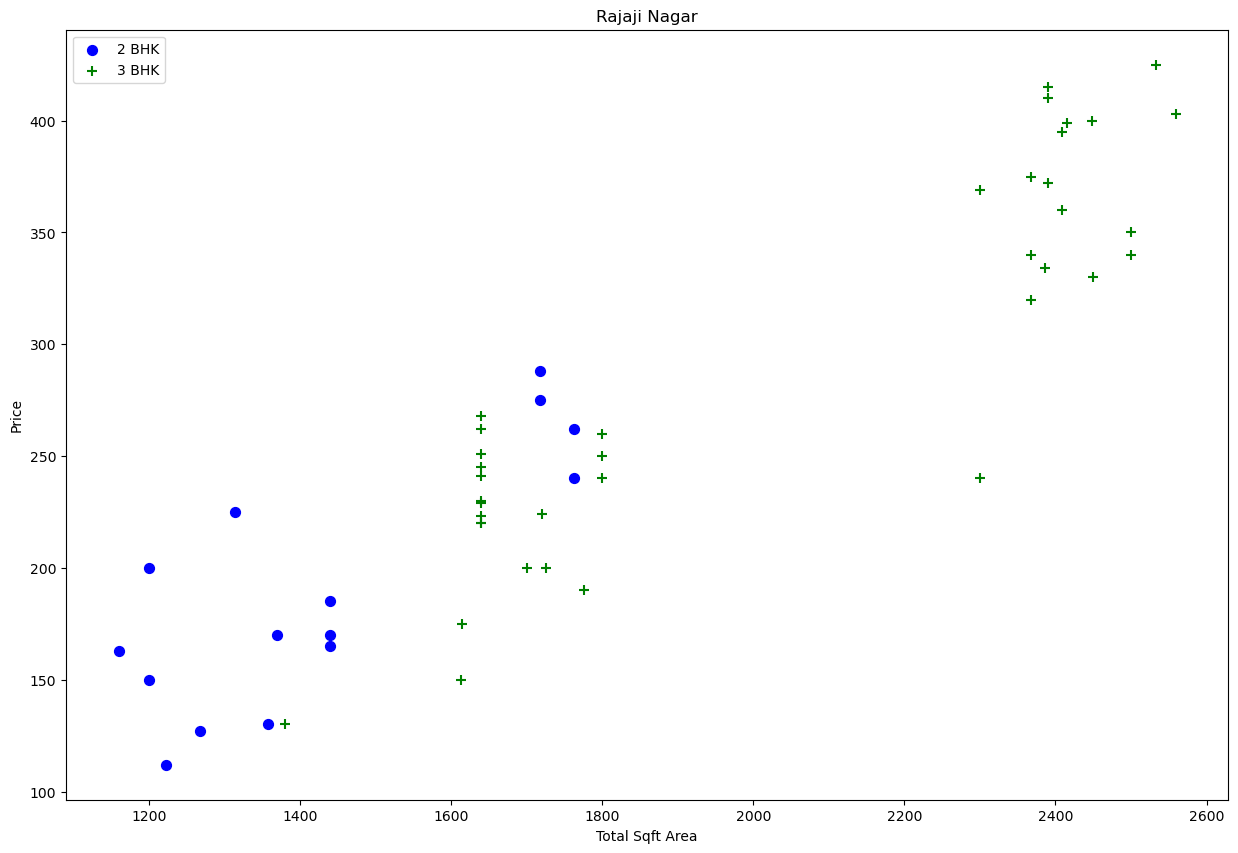

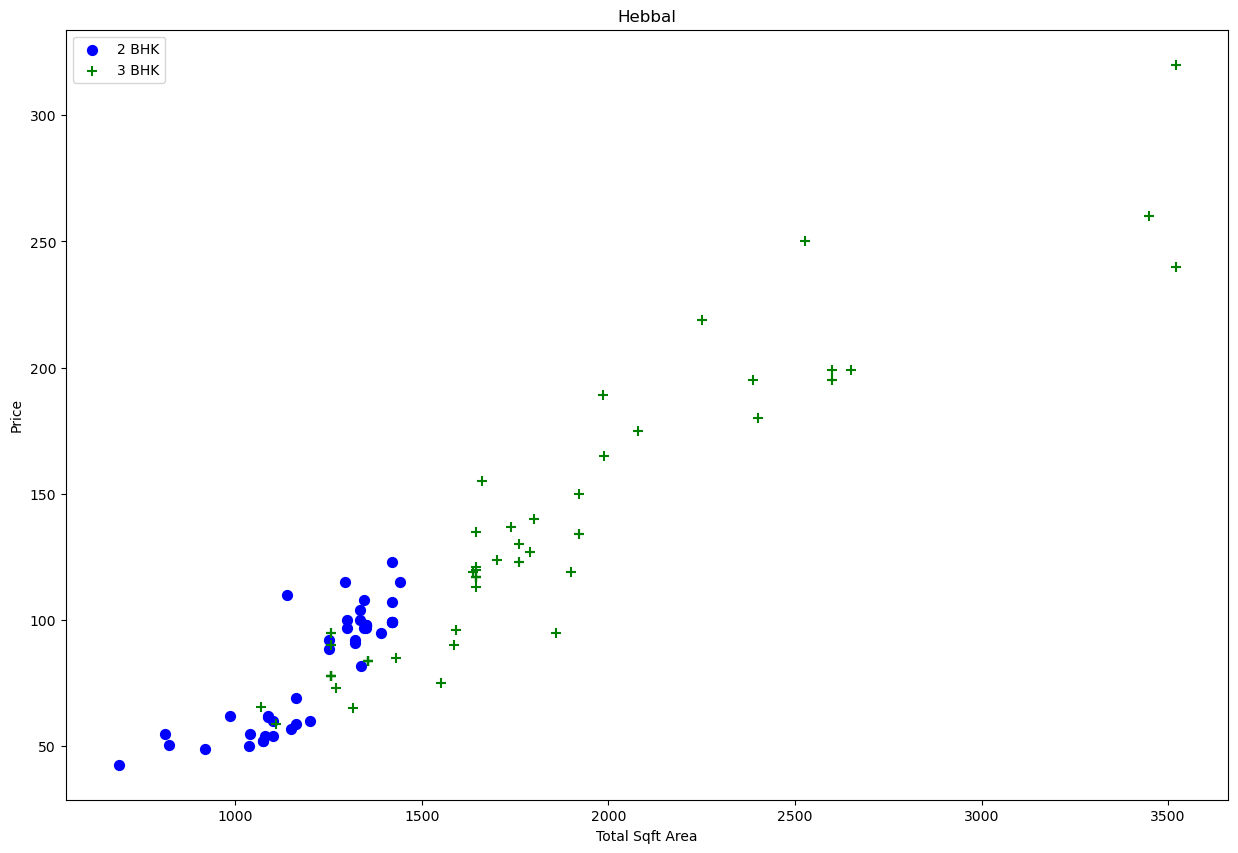

In [202]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df['location'] == location) & (df['BHK'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['BHK'] == 3)]
    plt.figure(figsize = (15, 10))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_plot(df7, "Rajaji Nagar")
plot_scatter_plot(df7, "Hebbal")

In [203]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : bhk_df["price_per_sqft"].mean(),
                'std' : bhk_df["price_per_sqft"].std(),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price_per_sqft"] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = "index")

df8 = remove_bhk_outliers(df7)
df8.shape

(7365, 7)

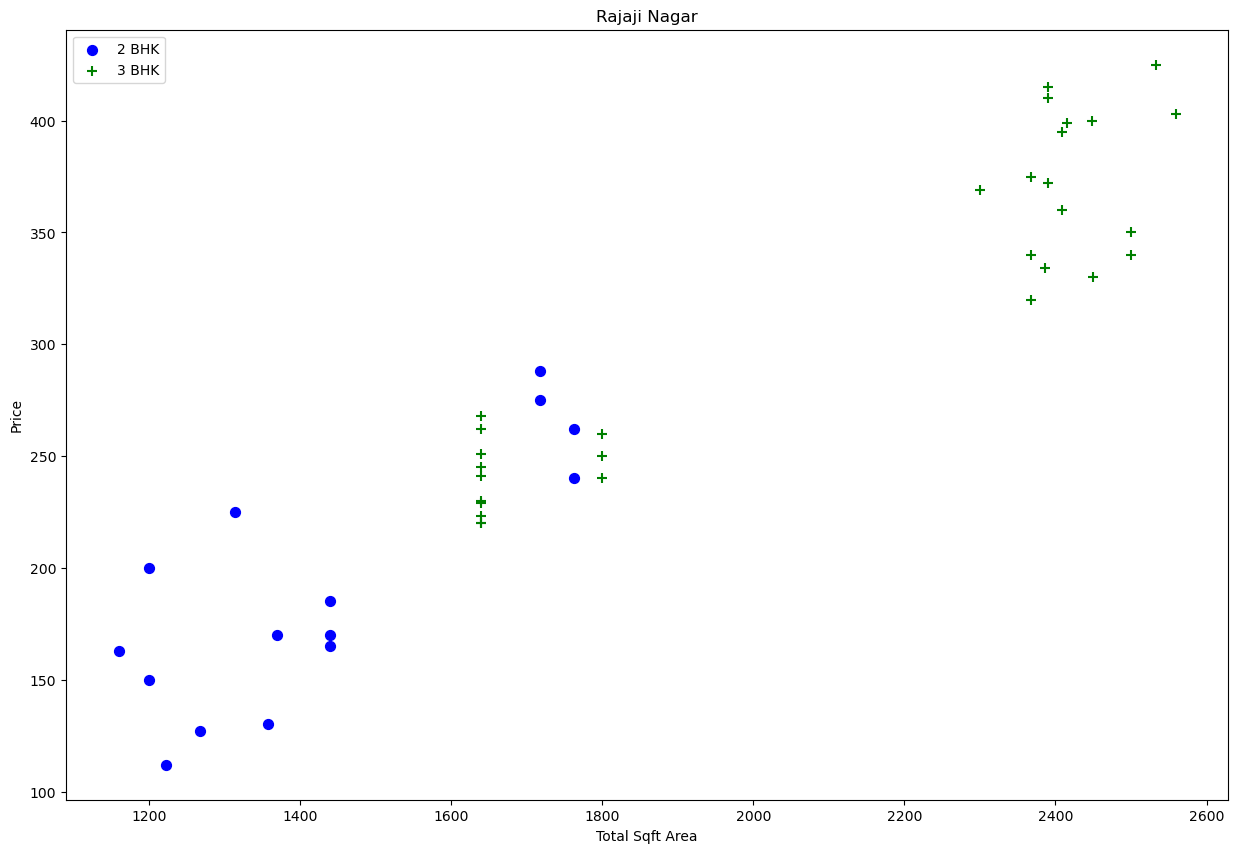

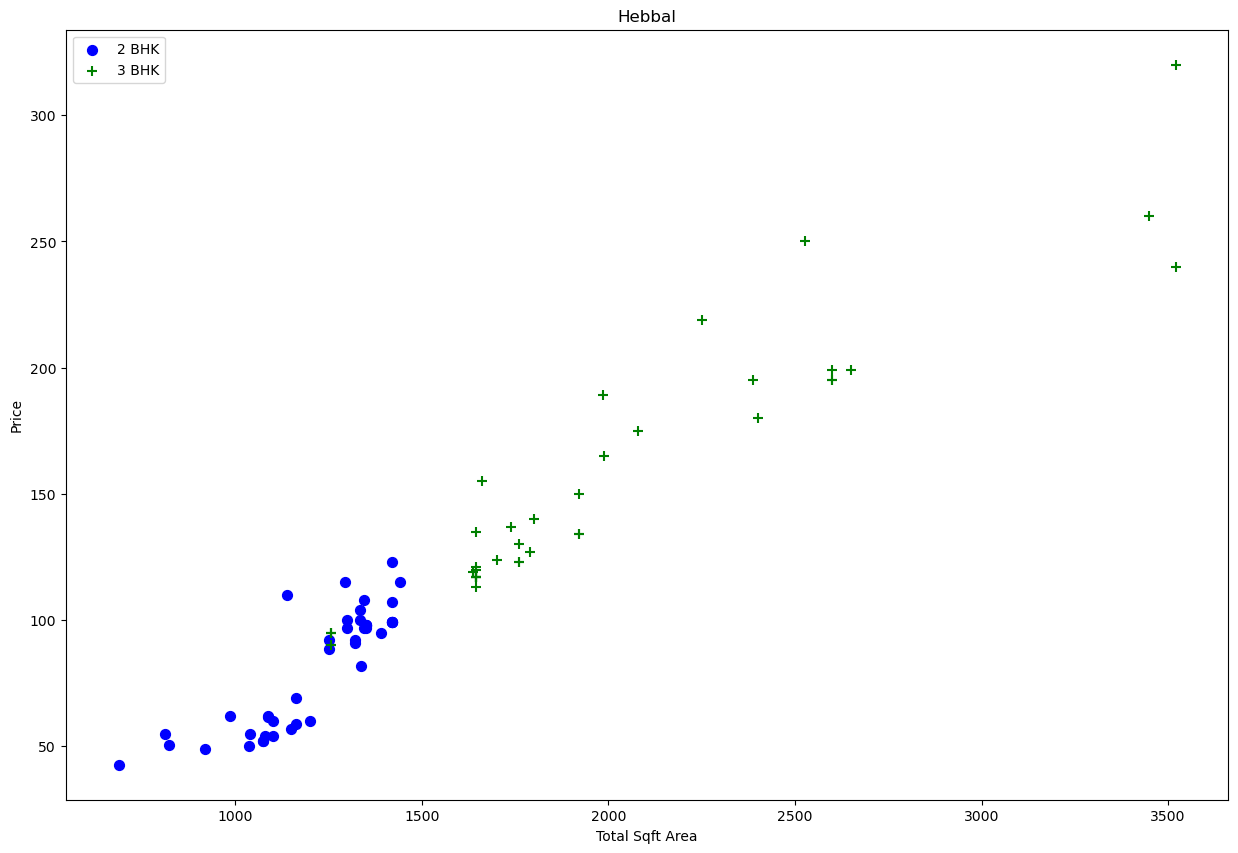

In [204]:
plot_scatter_plot(df8, "Rajaji Nagar")
plot_scatter_plot(df8, "Hebbal")

Text(0, 0.5, 'Count')

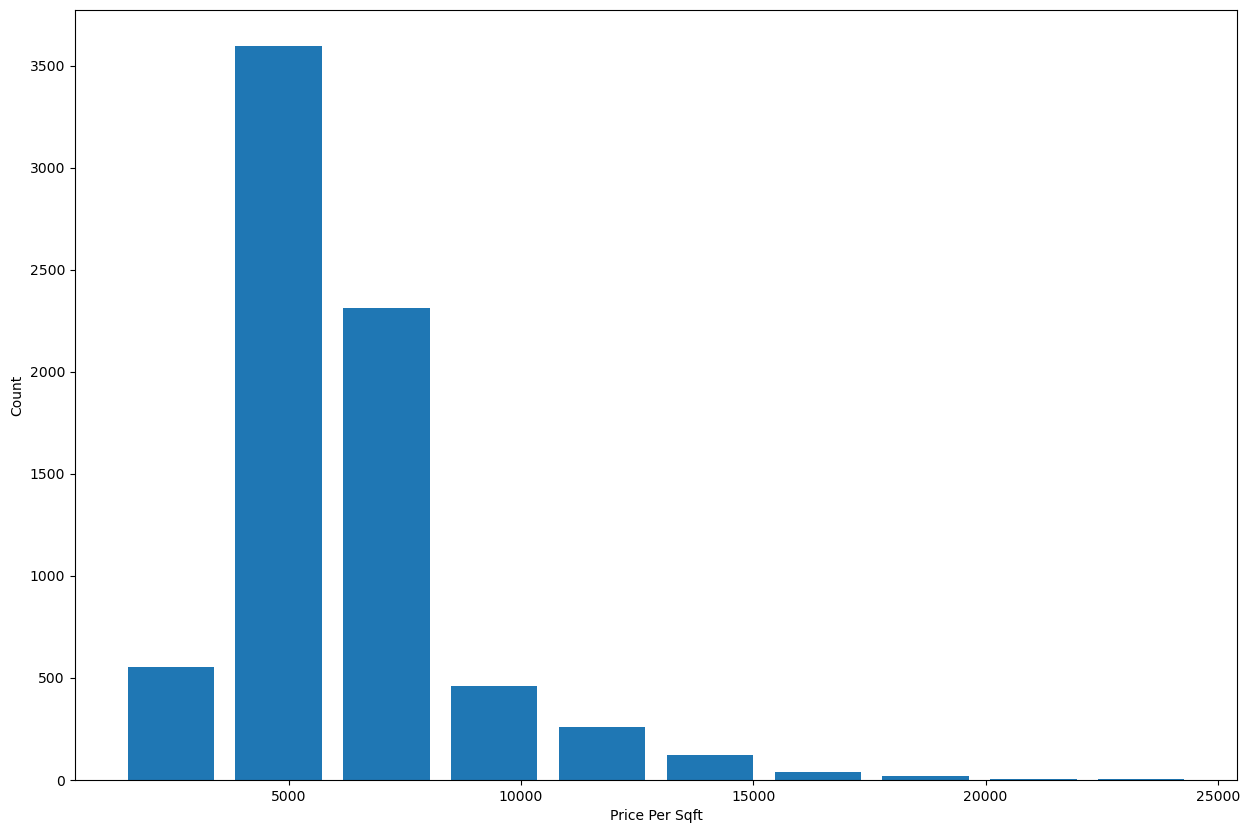

In [205]:
plt.figure(figsize = (15, 10))
plt.hist(df8['price_per_sqft'], rwidth = 0.8)
plt.xlabel('Price Per Sqft')
plt.ylabel("Count")

In [206]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [207]:
df8[df8['bath'] > 10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5312,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8533,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8622,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9357,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9688,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

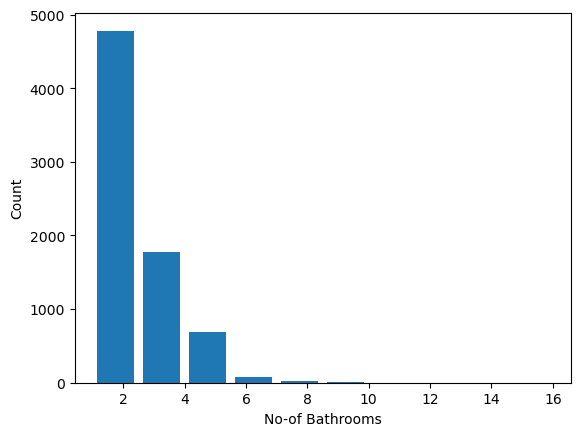

In [208]:
plt.hist(df8['bath'], rwidth = 0.8)
plt.xlabel('No-of Bathrooms')
plt.ylabel("Count")

In [209]:
df8[df8['bath'] > (df8['BHK'] + 2)]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5273,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6756,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8458,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [210]:
df9 = df8[df8['bath'] < (df8['BHK'] + 2)]
df9.shape

(7286, 7)

In [211]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 1)
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [212]:
df10.shape

(7286, 5)

In [213]:
# DATA TRANSFORMATION

In [214]:
# one hot encoder

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder = onehot.fit_transform(df10[['location']])
final_encoder = pd.DataFrame(encoder, columns = onehot.get_feature_names_out(['location']), index = df10.index)
final_encoder.head(3)

,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
final_encoder.shape

(7286, 241)

In [216]:
df11 = pd.concat([df10, final_encoder], axis = 1)
df11.head(3)

,location,total_sqft,bath,price,BHK,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
df11.shape

(7286, 246)

In [218]:
df12 = df11.drop("location", axis = 1)
df12.head(5)

,total_sqft,bath,price,BHK,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,235.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,130.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1235.0,2.0,148.0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
df12.shape

(7286, 245)

In [220]:
# Split the variables.

x = df12.drop('price', axis = 1)
x.head()

,total_sqft,bath,BHK,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1235.0,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [222]:
# Train, Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [271]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [272]:
model.fit(x_train, y_train)

LinearRegression()

In [273]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [226]:
from sklearn.metrics import r2_score
train = r2_score(y_train, y_pred_train)
test = r2_score(y_test, y_pred_test)

print("Train Score:", np.round(train, 2))
print("Test Score:", np.round(test, 2))

Train Score: 0.85
Test Score: 0.86


In [242]:
from sklearn.model_selection import ShuffleSplit, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()

ss = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 50)
cv_results = cross_validate(model, x, y, cv = ss)
cv_results

{'fit_time': array([0.05251741, 0.05004787, 0.04991746, 0.0475812 , 0.0587132 ]),
 'score_time': array([0.00647855, 0.00606585, 0.00581908, 0.00573897, 0.00651717]),
 'test_score': array([0.83886366, 0.84446372, 0.84450723, 0.83347338, 0.85416768])}

In [255]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                # 'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' :[1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' :['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 42)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x, y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, y)

C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    

,model,best_score,best_params
0,linear_regression,0.839904,{}
1,lasso,0.694334,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.795499,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [256]:
x.columns

Index(['total_sqft', 'bath', 'BHK', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=244)

In [257]:
np.where(x.columns == 'location_2nd Phase Judicial Layout')[0][0]

np.int64(5)

In [274]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1
        
    return model.predict([X])[0]

In [275]:
predict_price('location_1st Phase JP Nagar', 1000, 2, 2)

C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(95.1346218699258)

In [280]:
predict_price('location_1st Phase JP Nagar', 1000, 2, 3)

C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(94.53868086283522)

In [278]:
predict_price('location_Indira Nagar', 1000, 2, 2)

C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(192.49226997427704)

In [279]:
predict_price('location_Indira Nagar', 1000, 3, 3)

C:\Users\ptaru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(195.98631237063194)